## 의석이의 세로로 말해요

### 1-1. 문자열 15개 만들어서 join

In [ ]:
# 속도 빠름
# 문자열 15개 만들어서 join
for t in range(1, 2):
    result = [''] * 15
    #print(result)
    for _ in range(5):
        word = input()
        for i in range(len(word)):
            result[i] += word[i]
        #print(_, result)
    print('#%s %s' % (t, ''.join(result)))

### 1-2. 행, 열 첨자를 변경하고, try - except 사용

In [ ]:
# 속도 빠름
def make_word(words):
    length = 0
    for w in words:
        if len(w) > length:
            length = len(w)   # max_length 구함
 
    word = ''
    for i in range(length):
        for j in range(SIZE):
            try:
                word += words[j][i]
            except IndexError:    # if문으로 수정해 보면?
                pass
    return word
 
T = int(input())
SIZE = 5
for t in range(1, T+1):
    my_words = [list(input()) for _ in range(SIZE)]
    ans = make_word(my_words)
    print('#%d %s' % (t, ans))

### 1-3. 행, 열 첨자를 변경하고, if 사용

In [ ]:
# 위의 코드에서 try ~ except를 if로 수정한 것
def make_word(words):
    len_list = [len(w) for w in words] # length의 목록
    max_length = 0
    for length in len_list:
        if max_length < length:
            max_length = length   # max_length 구함
 
    word = ''
    for i in range(max_length):
        for j in range(SIZE):
            if i < len_list[j]:
                word += words[j][i]
    return word
 
T = int(input())
SIZE = 5
for t in range(1, T+1):
    my_words = [list(input()) for _ in range(SIZE)]
    ans = make_word(my_words)
    print('#%d %s' % (t, ans))

### 1-4. 각 행의 길이를 동일하게 만들고 zip, join 사용

In [ ]:
# 행에 포함된 열의 길이를 동일하게 만들기 위해 ''를 부족한 만큼 채운뒤,
# zip을 사용해 전치행렬을 구하고, join
T = int(input())
N = 5
for t in range(1,T+1):
    x = [list(input()) for _ in range(N)]
    max_len = 0
    for i in x:
        if len(i) > max_len:
            max_len = len(i)
    for i in x:
        while len(i) < max_len:
            i.append('')
    sero = list(zip(*x))
    result = ''
    for i in sero:
        result += ''.join(i)
    print('#%d %s' %(t,result))

### 1-5. 코드 길이 짧게 comprehension 사용

In [ ]:
# comprehension을 사용하여 
t = int(input())
for test_case in range(1, t + 1):
    ls = [input() for _ in range(5)]
    max_len = max(len(l) for l in ls)     
    answer = ''.join(l[i] for i in range(max_len) for l in ls if i < len(l))
    print('#%d %s' % (test_case, answer))

In [ ]:
t = int(input())
for test_case in range(1, t + 1):
    lines = [input() for _ in range(5)]
    answer = ''.join(line[idx] for idx in range(15) for line in lines if len(line) >= idx + 1)
 
    print('#%d %s' % (test_case, answer))

-----------------------------

## 회문2

### 2-1. 빠른 코드 1
- 코드는 길지만 빨라요
- 짧은길이 -> 긴길이로 올라가면서 검색


In [ ]:
def max_palindrome(string):
    N = len(string)
    max_len = 0
    # 양 끝에서는 회문을 검사할 필요가 없다. i는 회문의 중심이 될 요소의 인덱스
    for i in range(1, N-1):
        # 근데, 회문이 짝수개인 경우는 다음과 같이 처리한다.
        if string[i] == string[i-1] and string != string[i+1]:
            # 초기 회문의 길이가 2가 된다.
            temp_len = 2
            # 이전 값과 같은가를 기준으로 짝수 회문을 설정했으므로 j는 현재 인덱스, i는 이전 인덱스로 설정한다.
            # 이후 while문에서 i -= 1, j += 1을 통해 결국 양옆의 인덱스로 변하게 된다.
            j = i
            i -= 1
        else:
            # 초기 회문의 길이는 자기자신 1
            temp_len = 1
            # j는 현재부터 뒤로 나아갈 인덱스이므로 i의 값을 갖게 한다.
            j = i
        # 양 끝 중에 하나에 도달할 때까지
        while 0 < i and j < N-1:
            # i와 j를 1씩 줄이면 현재 회문에서 양옆의 값의 인덱스가 된다.
            i -= 1
            j += 1
            # 양옆의 값이 다르다면 반복을 중단, 같다면 회문의 길이를 2 늘린다.
            if string[i] != string[j]:
                break
            temp_len += 2

        if max_len < temp_len:
            max_len = temp_len

    return max_len


for t in range(1, 11):
    n = int(input())
    arr_row = [input() for _ in range(100)]
    max_result = 0
    for arr in arr_row, zip(*arr_row):
        for string in arr:
            temp_result = max_palindrome(string)
            if max_result < temp_result:
                max_result = temp_result

    print('#%d %d' %(t, max_result))


### 2-2. 빠른 코드 2


In [ ]:
def get_solution2(arr, m):
    n = len(arr[0])
    for word in arr:  # 1 ~ 100
        for s in range(n - m + 1):
            for k in range(m // 2):
                if word[s + k] != word[s + m - 1 - k]:
                    break
            else:
                return m
    return 0

#8크기의 회문이 있다 => maxLength
#9, 10 회문 없이 => 11, 12, 13



T = 10
for _ in range(1, T + 1):
    t = int(input())
    a = [input() for _ in range(100)]
    b = [x for x in zip(*a)]

    maxLength = 1
    for m in range(2, 101):
        if m > maxLength + 2: break
        if maxLength < get_solution2(a, m):
            maxLength = m

    for m in range(maxLength+1, 101):
        if m > maxLength + 2: break
        if maxLength < get_solution2(b, m):
            maxLength = m

    print('#%d %s' % (t, maxLength))

## 어디에 단어가 들어갈 수 있을까

### 3-1. live 교수님 코드 일부
- 패딩을 통해서 간단하게 할 수 있었죠

In [ ]:
테두리까지 이동, 경계를 이용하는 경우

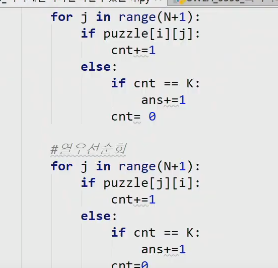

### 3-2. 수정해 볼까요 1

In [ ]:
# 상, 하, 좌, 우 패딩 
grid = [[0]+list(map(int, input().split())+[0] for g in range(N)]
grid.insert(0, [0]*len(grid[0]))
grid.append([0]*len(grid[0])

In [ ]:
# 코드는 길어도 속도는 빨라요
# 수정해 보면 좋을 듯요!
T = int(input())
for t in range(1, T+1):
    N, K = map(int, input().split())
    grid = []
    for g in range(N):
        grid.append(list(map(int, input().split())))
    cnt = 0
    for r in range(N):
        l = 0
        for c in range(N):
            if grid[r][c] == 1:
                l += 1
            else:
                if l == K:
                    cnt += 1
                l = 0
        if l == K:
            cnt += 1

    for c in range(N):
        l = 0
        for r in range(N):
            if grid[r][c] == 1:
                l += 1
            else:
                if l == K:
                    cnt += 1
                l = 0
        if l == K:
            cnt += 1
    print("#%d %d" % (t, cnt))

### 3-3. 수정해 볼까요 2

In [ ]:
# 코드는 길지만 속도는 빠르다오 - live 강사님과 같았는데 조금만 수정하면 짱
# 수정해 볼까요!
T = int(input())
 
def check_place(puzzle):
    answer = 0
 
    streak = 0 # 1이 연속적으로 나온 횟수
    # 가로 체크
    for row in puzzle:
        for i in row:
            if i:
                streak += 1
            else: # 벽을 만났을때
                # 이전까지 쌓인 연속 횟수가 k번 이었다면
                if streak == k: 
                    answer += 1
                streak = 0
    # 세로 체크
    for j in range(len(puzzle)):
        for i in range(len(puzzle[0])):
            if puzzle[i][j]:
                streak += 1
            else:
                if streak == k:
                    answer += 1
                streak = 0
    return answer
 
for test_case in range(1, T + 1):
    # input 받기
    n, k = map(int, input().split())
 
    # 퍼즐 초기화
    puzzle = []
    # 한줄 + 0 받아오기
    for _ in range(n):
        lst = list(map(int, input().split()))
        lst.append(0)
        puzzle.append(lst)
     
    # 퍼즐 맨 마지막줄에 0으로 된 한줄 받아오기 (벽 만들기)
    puzzle.append([0]*(n+1))
     
    # 함수 호출
    answer = check_place(puzzle)
    print(f'#{test_case} {answer}')

### 3-4. 새로운 아이디어

In [ ]:
# 난난나 난난나나나
T = int(input())
for t in range(1, T+1):
    N, K = map(int, input().split())
    puzzle = [list(map(int, input().split())) for i in range(N)]
    result = 0
    for i in range(N):
        row_count = 0
        col_count = 0
        for j in range(N):
            row_count = row_count * puzzle[i][j] + puzzle[i][j]
            col_count = col_count * puzzle[j][i] + puzzle[j][i]
            if row_count == K:
                if j == (N - 1) or puzzle[i][j+1] == 0:
                    result += 1
            if col_count == K:
                if j == (N - 1) or puzzle[j+1][i] == 0:
                    result += 1
    print('#%d %d' %(t, result))

### 3-5. 메서드를 써서 풀면

In [ ]:
# split, count로 풀어요 -.-?!
T = int(input())
for t in range(1, T+1):
    n, m = map(int, input().split())
    ra = [''.join(input().split()) for i in range(n)]
    ca = [''.join(i) for i in list(zip(*ra))]   # 배열 전환
    ans = 0
    pattern = '1'*m
    for a in ra, ca:
        for r in a:
            x = r.split('0')  #11100001110001111
            #if pattern in x:
            ans += x.count(pattern)
    print('#%d %d' % (t, ans))

## 쇠막대기 자르기

### 4-1. 설계 그림이 예술

In [ ]:
김채은님 설계

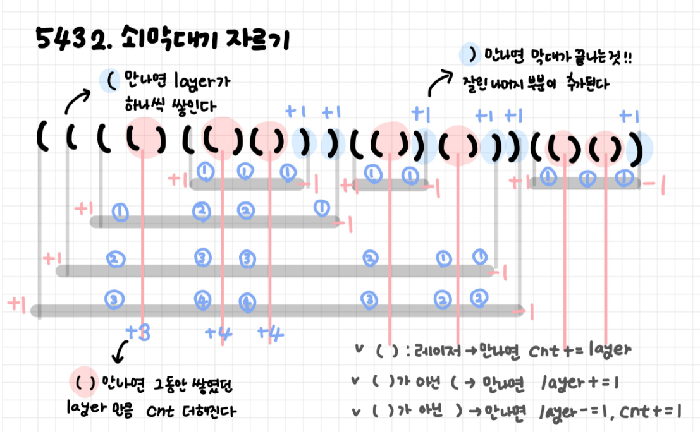

In [ ]:
# 쇠막대기 - 스택으로 풀기
First In Last Out, Last In First Out


## 숫자 배열 회전

In [ ]:
T = int(input())
 
def reverse_map(lst):
    return list(reversed(lst))
 
 
for t in range(1, T+1):
    N = int(input())
    square = []
 
    for _ in range(N):
        square.append(list(map(str, input().split())))
     
    square_90  = list(map(reverse_map, list(zip(*square))))
    square_180 = list(map(reverse_map, list(zip(*square_90))))
    square_270 = list(map(reverse_map, list(zip(*square_180))))
 
    print('#%d' % t)
    for i in range(N):
        print("".join(square_90[i]), end=" ")
        print("".join(square_180[i]), end=" ")
        print("".join(square_270[i]))

In [ ]:
1 2 3    7 4 1
4 5 6    8 5 2
7 8 9 -> 9 6 3

In [ ]:
1 0 0   0 2
2 0 1   1 2
3 0 2   2 2
4 1 0   0 1
5 1 1   1 1
6 1 2   2 1
7 2 0   0 0
8 2 1   1 0
9 2 2   2 0

In [ ]:
def shift90(arr):
    new_arr = [[0] * N for _ in range(N)]
    for r in range(N):
        for c in range(N):
            new_arr[c][N-r-1] = arr[r][c]
    return new_arr
 
 
def shift180(arr):
    # 사실 shift 90 2번하면 됨
    new_arr = [[0] * N for _ in range(N)]
    for r in range(N):
        for c in range(N):
            new_arr[N-r-1][N-c-1] = arr[r][c]
    return new_arr


def shift270(arr):
    # 사실 shift 90 3번
    new_arr = [[0] * N for _ in range(N)]
    for r in range(N):
        for c in range(N):
            new_arr[N-c-1][r] = arr[r][c]
    return new_arr
 
 
T = int(input())
 
for tc in range(1, T+1):
    N = int(input())
 
    nums = [input().split() for _ in range(N)]
 
    num_90 = shift90(nums)
    num_180 = shift180(nums)
    num_270 = shift270(nums)
 
    print('#%d' % tc)
    for i in range(N):
        print(''.join(num_90[i]), ''.join(num_180[i]), ''.join(num_270[i]))